# Methods and Tools

## Interactive Lectures

**All lectures in the course will be _interactive_**

They contain running code, as well as theory!

* Presented and discussed in frontal lectures...
* ...You can download PDFs
* ...But you will also be able to _make changes and experiment_

**From a software perspective, the workshorses of this approach are:**

* [Jupyter](https://jupyter.org) notebooks for the presentation & interaction
* [Docker](https://www.docker.com) containers for the setup and distribution

**Both are widely used systems:**

* Jupyter is a user favorite when it comes to data science
* Docker is a state-of-the-art system for manageing services

# A Few Words  about Docker

## Docker

**Docker is a system for running software in _"containers"_**

<center><img src="assets/vertical-logo-monochromatic.png" width="30%"/></center>


Think of a container as a _lightweight virtual machine_:

* (Essentially) the same level of isolation
* ...But smaller disk footprint, faster setup and operation, etc.

## Docker

**Docker is a system for running software in _"containers"_**

<center><img src="assets/vertical-logo-monochromatic.png" width="30%"/></center>

Using containers has _many advantages_:

* Multiple environments on the same machine
* Improved isolation, robustness, and reproducibility
* Easier replication
* Scalability of cloud services...

## Docker

**During this course we will see many problems**

...And tackle them with _many techniques_:

* Classical Machine Learning
* Deep Learning
* Statistics
* Signal processing
* Declarative optimization
* Differential Equations
* ...

Managing dependences can become hellish 


## Docker

**With docker, we can simply use _a different container per case study_**

_Inside each container_ we will have:

* All the needed libraries & tools
* A running instance of a Jupyter server

_In the host_ machine (your PC):

* We will just open a browser...
* ...And connect to the Jupyter server

**Two key concepts in Docker**

* A _container_ is a (sort of) running, lightweight, Virtual Machine
* An _image_ is (sort of) the content of the hard disk of the VM

The image can be used to instantiate multiple containers

## Building an Image

**Images in docker are built by:**

* Starting from a base image on [Docker Hub](https://hub.docker.com)
* Copying content between the host and the container
* Running commands in the container

**The process is controlled via a Dockerfile**

* Just a text file with a specific syntax
* There is an [extensive reference](https://docs.docker.com/engine/reference/builder/), but we only care about a few commands

**To build an image, we can use:**

```sh
docker build .
```

...From the directory with the Dockerfile


## An Example Dockerfile

**This is a simple _Dockerfile_ example:**

```dockerfile
FROM python:3.8
RUN pip install jupyter pandas sklearn matplotlib ipympl RISE
COPY . /app
WORKDIR /app/notebooks
CMD ["jupyter", "notebook", "--port=8888", "--no-browser", "--ip=0.0.0.0", "--allow-root"]
```

* The `FROM` keyword specifies the base image

## An Example Dockerfile

**This is a simple _Dockerfile_ example:**

```dockerfile
FROM python:3.8
RUN pip install jupyter pandas sklearn matplotlib ipympl RISE
COPY . /app
WORKDIR /app/notebooks
CMD ["jupyter", "notebook", "--port=8888", "--no-browser", "--ip=0.0.0.0", "--allow-root"]
```

* The `RUN` keyword runs a command
* In our case, we install a number of python packages

## An Example Dockerfile

**This is a simple _Dockerfile_ example:**

```dockerfile
FROM python:3.8
RUN pip install jupyter pandas sklearn matplotlib ipympl RISE
COPY . /app
WORKDIR /app/notebooks
CMD ["jupyter", "notebook", "--port=8888", "--no-browser", "--ip=0.0.0.0", "--allow-root"]
```

* The `COPY` keyword transfers data from the host to the container
* The first path refers to the host
* The second path to the container

## An Example Dockerfile

**This is a simple _Dockerfile_ example:**

```dockerfile
FROM python:3.8
RUN pip install jupyter pandas sklearn matplotlib ipympl RISE
COPY . /app
WORKDIR /app/notebooks
CMD ["jupyter", "notebook", "--port=8888", "--no-browser", "--ip=0.0.0.0", "--allow-root"]
```

* The `WORKDIR` changes the current directory in the container
* It's like running `cd` in the container

## An Example Dockerfile

**This is a simple _Dockerfile_ example:**

```dockerfile
FROM python:3.8
RUN pip install jupyter pandas sklearn matplotlib ipympl RISE
COPY . /app
WORKDIR /app/notebooks
CMD ["jupyter", "notebook", "--port=8888", "--no-browser", "--ip=0.0.0.0", "--allow-root"]
```

* The `CMD` keyword is triggered only when we _run_ a container
* It's the first command that the container should execute
* It does nothing when building an image

## An Example Dockerfile

**When we run `docker build .` for our file:**

* The docker daemon downloads the base image, if not already available
* A container is started
* All operations in the Dockerfile are executed
* The resulting container is dumped, to create an _image_

**You can check that a new image has been built using:**

```sh
docker image ls
```

You will see an entry with no name:

```sh
REPOSITORY    TAG         IMAGE ID        CREATED             SIZE
<none>        <none>      96b910c1514f    3 seconds ago       1.36GB
```

## An Example Dockerfile

**You can remove an image with:**

```sh
docker image rm <image name or id>
```

* Useful to free space, however...
* ...Images are incremental! Docker stores only the differences
* ...So, don't worry too much about space usage

**You can remove all images with no running container with:**

```sh
docker image prune
```

## Running a Container

**You can instantiate and run a container with:**

```sh
docker run <image name or id>
```

* The container `stdout` will be piped (i.e. connected) to your terminal
* By default, this is not the case for `stdin`
* You can make the container interactive with the `-it` options
* You can autoremove the container at the end with `--rm`
* You can sync folders in the host and on the container using [volumes](https://docs.docker.com/storage/volumes/)

The [documentation](https://docs.docker.com/engine/reference/run/) is extensive

## Running a Container

**You can obtain the list of all containers with:**

```sh
docker ps
```

* The option `-a` shows all containers (incl. those that are stopped)

**You can remove a container with**

```sh
docker rm <container id>
```

* As you see, it's a very flexible system
* ...But also a bit complex

**That's why we will automate most operations using _Docker Compose_**

## Docker Compose

**_Docker Compose_ is a tool to help the management of containers**

In a second `docker-compose.yml` file, you specify:

* Which "services" (i.e. container) should be built and run
* How to build them
* Which options to use when running them
* ...

All in a [human-readable, declarative format](https://yaml.org)

## A Docker Compose Example

**Let's see a simple `docker-compose.yml` for one lecture:**

```yaml
version: '2.0'
services:
  jupyter:
    build: .
    ports:
    - "8888:8888"
    volumes:
    - .:/app
```

* `version` refers to the Docker Compose syntax
* `services` is followed by a list of the containers
* `jupyter` is our service
* `build` specifies where the `Dockerfile` can be found

## A Docker Compose Example

**Let's see a simple `docker-compose.yml` for one lecture:**

```yaml
version: '2.0'
services:
  jupyter:
    build: .
    ports:
    - "8888:8888"
    volumes:
    - .:/app
```

* `ports` tells which ports to expose to `docker run`
* `volumes` specifies which folders to sync
* In our case "/app/notebooks" on the container
* ...Will actually be "./notebooks" on the host


## Benefits of Using Docker Compose

**We need to use one more tool, but now we can:**

_Build and run_ a container with:

```sh
docker compose up
```

* The command can also restart a stopped container

_Stop_ the container with CTRL+C, or with:

```sh
docker compose stop
```

Stop _and remove_ the container with:

```sh
docker compose down
```

...Which is considerably simpler than before!

# Our Jupyter Setup

## Our Setup

**We will often work with this development setup**

The folder with the notebooks is structured as follows:

```
notebook1.pynb
notebook2.pynb
...
util     <-- module
assets   <-- images and such
rise.css <-- for the "slide" mode
```

## Our Setup

**We will often work with this development setup**

The folder with the notebooks is structured as follows:


```
notebook1.pynb
notebook2.pynb
...
util +-- __init__.py
     +-- XYZ.py       <-- submodule
     +-- YZX.py       <-- submodule
     +-- ...
font
rise.css
```

**The most important part:** we'll use _modules_ besides notebooks

## Our Setup

**Working with modules provides some advantages:**

We do not need to keep all our code in the notebooks. We can:

* _Share_ functions _between cells_
* _Share_ functions _between notebooks_
* IDEs can offer _more functionality_ if they recognize a module

**...But also a significant disadvantage:**

* Python modules are compiled first when loaded...
* ...The loaded version is _not updated_ when the source changes

This is very inconvenient at development time

## Our Setup

**We can circumvent this thanks to Jupyter "magic" extensions**

The first one is [the "autoreload" extension](https://ipython.org/ipython-doc/3/config/extensions/autoreload.html)

In [1]:
%load_ext autoreload
%autoreload 2


* `load_ext` will enable the extension
* `autoreload 2` will reload all modules before code execution

**This is _inefficient, but convenient_ during development**

* Together with the use of volumes (in docker-compose)...
* ...This allows us to update the code without re-building the docker image


## Starting a Notebook

Let's look back to the `CMD` keyword in our `Dockerfile`:

```dockerfile
CMD ["jupyter", "notebook", "--port=8888", "--no-browser", \
     "--ip=0.0.0.0", "--allow-root"]
```

This is translated to:

```sh
jupyter notebook --port=8888 --no-browser --ip=0.0.0.0 --allow-root
```

* `--port 8888`: the server listen on port 8888
* `--no-browser`: do not open the browser (there's no browser in the container)
* `--ip=0.0.0.0`: listen on all network interfaces
* `--allow-root`: we operate as `root` (admin) on the container

## Starting a Notebook

When we run:

```sh
docker compose up
```

The output will look like:
```sh
Starting ad_stat_jupyter_1 ... done
...
...Use Control-C to stop this server and shut down all kernels...
...
...To access the notebook...
...copy and paste one of these URLs:
...    http://34b908cf2362:8888/?token=82e337a2be9915cdebce276bf...
... or http://127.0.0.1:8888/?token=82e337a2be9915cdebce276bf...
```

* The last URL can be _copy-pasted in your favorite browser_

## Starting a Notebook

When we run:

```sh
docker compose up
```

The output will look like:
```sh
Starting ad_stat_jupyter_1 ... done
...
...Use Control-C to stop this server and shut down all kernels...
...
...To access the notebook...
...copy and paste one of these URLs:
...    http://34b908cf2362:8888/?token=82e337a2be9915cdebce276bf...
... or http://127.0.0.1:8888/?token=82e337a2be9915cdebce276bf...
```

* The `token` is cached by the browser and grants access to the notebooks

## Our Setup

* We will somtimes use the `ipympl` package and the `widget` jupyter magic
* This will display basic tools to rescale and zoom images

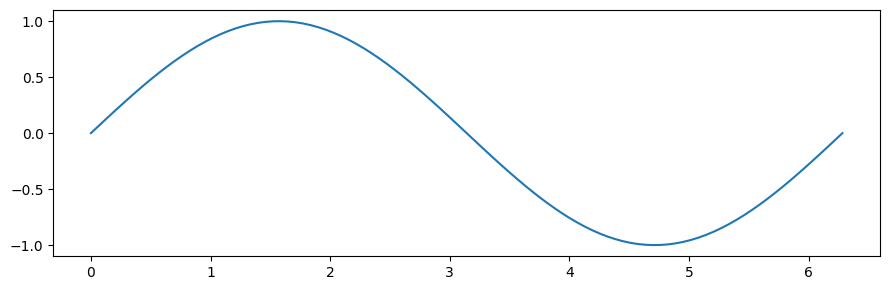

In [2]:
#%matplotlib widget
from matplotlib import pyplot as plt
import numpy as np
x = np.linspace(0, 2*np.pi, 100)
plt.figure(figsize=(9, 3))
plt.plot(x, np.sin(x))
plt.tight_layout()